@Purpose: This simple linear regression model was created for Problem One of Assignment One of CX 4803 CML (Introduction to Computational Machine Learning) at Georgia Tech for Fall 2024. 

@Author: Lokkit Sanjay Babu Narayanan

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('hw1_q1.csv')
X = df[['x1', 'x2', 'x3']]
y = df['y']
X = X.to_numpy()
y = y.to_numpy()

In [2]:
#x0 = np.ones((x.shape[0], 1))
#x = np.concatenate((x0, x), axis=1)

#t1 = (np.linalg.inv(x.transpose()@x)@x.transpose()@y)
#t1 = np.linalg.inv(x.T @ x) @ x.T @ y

# This cell is the code to compute the weights using the normal equation

X = np.column_stack((np.ones(X.shape[0]), X))

t1 = X.T @ X
t2 = np.linalg.inv(t1)
t3 = t2 @ X.T

w = t3 @ y
print('w')
print(w)



w
[-1.80089605  0.93038429  2.12104318  0.97668634]


In [3]:
#Estimate the coefficients of the linear regression model using the normal equation
print('The coefficients of the linear regression model are:')
print('w0 =', w[0])
print('w1 =', w[1])
print('w2 =', w[2])
print('w3 =', w[3])


The coefficients of the linear regression model are:
w0 = -1.8008960516975814
w1 = 0.9303842929703325
w2 = 2.1210431840351553
w3 = 0.9766863410472943


In [4]:
# This cell is the code to predict the value of y given x = [0.4, 0.2, 0.1] for part b of question 1

x = np.array([0.4, 0.2, 0.1])

Y = w[0]*1 + w[1]*x[0] + w[2]*x[1] + w[3]*x[2]

print('The predicted value of y for x = [0.4, 0.2, 0.1] is:', Y)

The predicted value of y for x = [0.4, 0.2, 0.1] is: -0.9068650635976878


In [5]:
# This cell is the code to estimate the variance of the noice for the model for part c of question 1

y_hat = X @ w   # predicted value of y
epsilon = y - y_hat # error
n = len(y) # number of data points
p = 3 # number of features
sigsq = np.sum(epsilon**2)/(n-p-1) # variance of the noise

print('The variance of the noise for the model is:', sigsq)

check = np.var(y)
sig = np.sqrt(sigsq)
print('variance of vector y is: ',check)
print('The Sigma Value of the model is: ', sig)

The variance of the noise for the model is: 0.1323349903720068
variance of vector y is:  6.712226499593834
The Sigma Value of the model is:  0.3637787656969642


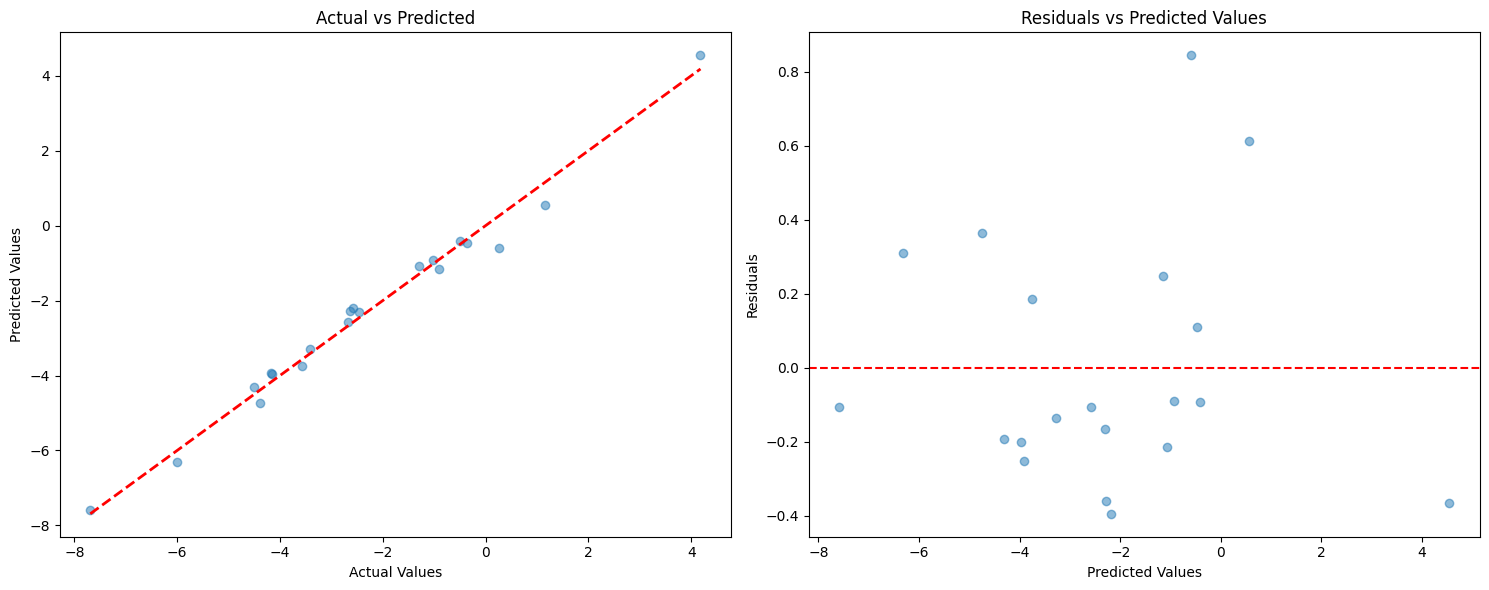

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Actual vs Predicted plot
ax1.scatter(y, y_hat, alpha=0.5)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Actual vs Predicted')

    # Residuals plot
ax2.scatter(y_hat, epsilon, alpha=0.5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

In [14]:
#Covariance Estimation

def estimate_covariance(n):
    # Generate n samples from Uniform(0, 1)
    X = np.random.rand(n)
    
    # Compute Y = X^2
    Y = X**2
    
    # Compute sample means
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    
    # Compute covariance
    cov_XY = np.sum((X - mean_X) * (Y - mean_Y)) / (n - 1)
    
    return cov_XY

# Number of samples
n = 100000  # You can adjust this number based on your needs

# Estimate covariance
covariance_estimate = estimate_covariance(n)

print(f'Estimated Cov(X, Y) with n={n}: {covariance_estimate}')


Estimated Cov(X, Y) with n=100000: 0.08323195336375304
